# NSDC Data Science Projects

  ### Project: Customer Segmentation Analysis
  ###  Name: Min Jiang


**Project Description:**

This project will introduce students to an array of skills as they strive to create an unsupervised machine learning model to divide customers into segments to optimize the significance of each customer. Customer segmentation is the process of grouping consumers according to characteristics that are shared by all of the customers in a cluster. We will also cover visualizations and how to deploy models in the real world.




<h3 align = "center">
    Milestone #1: Data Retrieval and Pre-Processing
</h3>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic data preparation tasks.

**Step 1:** Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [2]:
#TODO: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

---

**Step 2:** Let’s access our data. We will be using the Marketing Campaign dataset from Kaggle.


[The Marketing Campaign  dataset is available at this link](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [3]:
# TODO: Read the data using pandas read_csv function
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv",  sep=';')
df

Mounted at /content/drive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


---

**Step 3:** Let's prepare our data for analysis. Follow the steps below to review the first 5 rows of your dataset, display column names, and get other basic information about the dataset.

In [4]:
# TODO: Print the first 5 rows of the data using the head function of pandas.
print(df.head(5))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [5]:
# TODO: Display all the column names.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# TODO: Print the dimensions of the datase.
df.shape

(2240, 29)

In [8]:
# TODO: Get basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# TODO: Describe the data.
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# TODO: Check for missing values in the dataset.
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
# TODO: Drop the missing values.
df.dropna(inplace = True)

In [12]:
# TODO: Check for duplicates.
df.duplicated().sum()

np.int64(0)

In [13]:
#TODO: Rename column names.
df.rename(columns = {'NumWebVisitsMonth':'Num_visit_monthly'}, inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Num_visit_monthly,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0



---

---
---



<h3 align = "center">
    Milestone #2: Feature Engineering
</h3>

GOAL: The main goal of this milestone is to do some feature engineering and perform exploratory data analysis (EDA).

**Step 1:** The goal of this step is to perform feature engineering as required and drop the features that are irrelevant. To better understand feature engineering, [review this resource.](https://builtin.com/articles/feature-engineering) Then, fill in the blanks below.

In [14]:
# TODO: Perform feature engineering as required.
# Create a new column named 'Age'.
df['Age'] = 2022 - df['Year_Birth']

# TODO: Create a new column for all the accepted campaigns.
df['Accepted_Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# TODO: Create a new column for all the items.
df['Total_Items'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# TODO: Create a new column for all the purchases.
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# TODO: Display the dataframe with the updated columns.
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Accepted_Campaigns,Total_Items,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,65,0,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,68,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,0,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,38,0,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,0,422,19


In [15]:
 # TODO: Drop irrelevant features.
df = df.drop(['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis = 1)

# TODO: Display the dataframe.
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Accepted_Campaigns,Total_Items,Total_Purchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,65,0,1617,25
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,68,0,27,6
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,57,0,776,21
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,38,0,53,8
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,41,0,422,19


---

**Step 2:** Now that we have dealt with outliers and done some feature engineering, the next step is to plot some distributions and check for outliers. To do so, [review this resource to best understand interquartile range](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review), as we will be using that statistic below. Then, fill in the blanks.

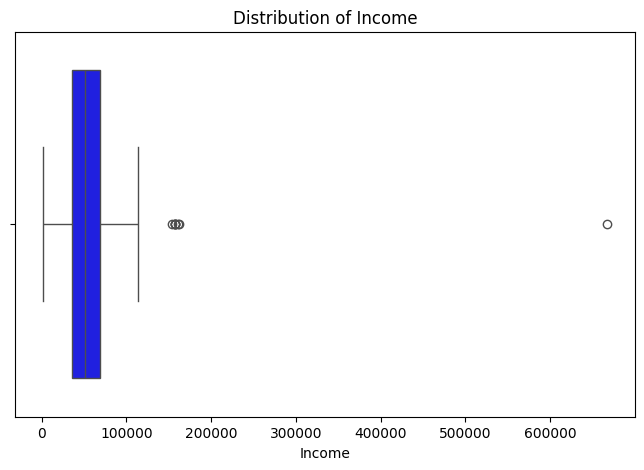

In [16]:
# TODO: Plot distributions for the relevant columns and check for outliers.
# Boxplot for `Income` distribution.
plt.figure(figsize = (8,5))
sns.boxplot(df, x = 'Income',  color = 'blue')
plt.title('Distribution of Income');

In [17]:
# TODO: Calculate the Interquartile range (IQR) for the `Income` column.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# TODO: Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# TODO: Print the number of outliers
print("Outliers in the Income column:", len(outliers))

Outliers in the Income column: 8


In [18]:
# TODO: Remove the outliers in the `Income` column.
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

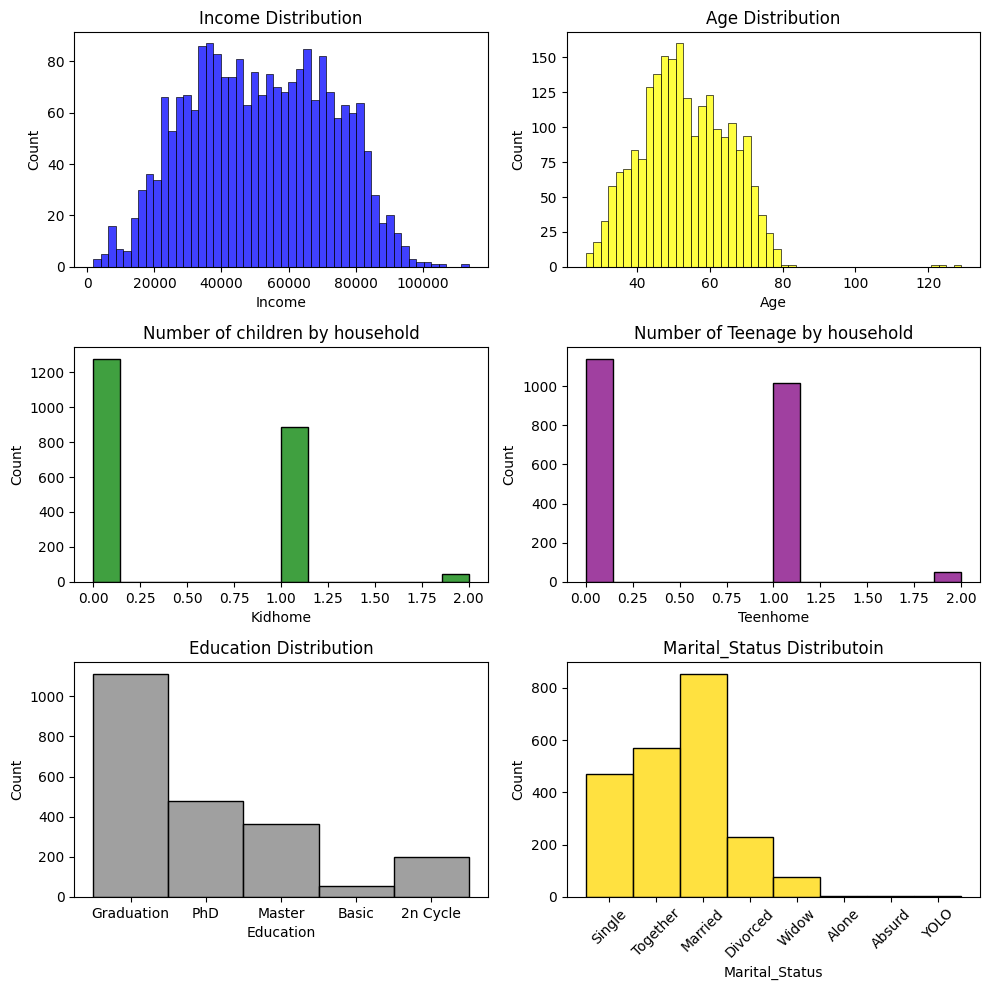

In [19]:
# TODO: Plot Histograms for the important columns.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))

# TODO: Histogram for `Income` distribution.
sns.histplot(df, x = 'Income', color = 'blue', bins = 50, ax = axes[0,0])
axes[0,0].set_title('Income Distribution')

# TODO: Histogram for `Age` distribution.
sns.histplot(df, x = 'Age', color = 'yellow', bins = 50, ax = axes[0,1])
axes[0,1].set_title('Age Distribution')

# TODO: Histogram for `Kidhome` distribution.
sns.histplot(df, x = 'Kidhome', color = 'green', ax = axes[1,0])
axes[1,0].set_title('Number of children by household')

# TODO: Histogram for `Teenhome` distribution.
sns.histplot(df, x = 'Teenhome', color = 'purple', ax = axes[1,1])
axes[1,1].set_title('Number of Teenage by household')

# TODO: Histogram for `Education` distribution.
sns.histplot(df, x = 'Education', color ='gray', ax = axes[2,0])
axes[2,0].set_title('Education Distribution')

# TODO: Histogram for `Marital_Status` distribution.
sns.histplot(df, x = 'Marital_Status', color = 'gold', ax = axes[2,1])
axes[2,1].set_title('Marital_Status Distributoin')
plt.xticks(rotation = 45)

plt.tight_layout();

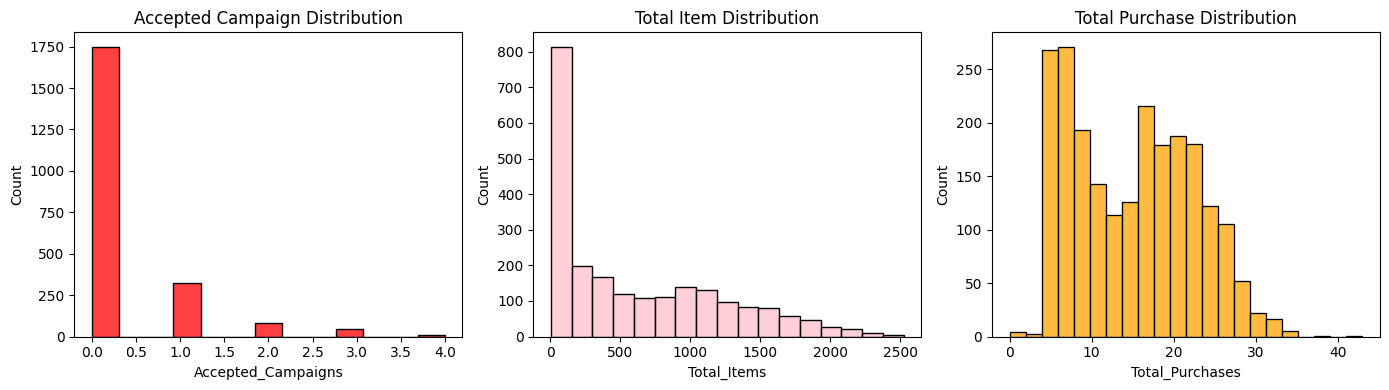

In [20]:
# TODO: Distributions for `Accepted_Campaigns`, `Total_Items`, and `Total_Purchases columns.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))

sns.histplot(df, x = 'Accepted_Campaigns', color = 'red', ax = axes[0])
axes[0].set_title('Accepted Campaign Distribution')

sns.histplot(df, x = 'Total_Items', color = 'pink', ax = axes[1])
axes[1].set_title('Total Item Distribution')

sns.histplot(df, x = 'Total_Purchases', color = 'orange', ax = axes[2])
axes[2].set_title('Total Purchase Distribution')
plt.tight_layout();

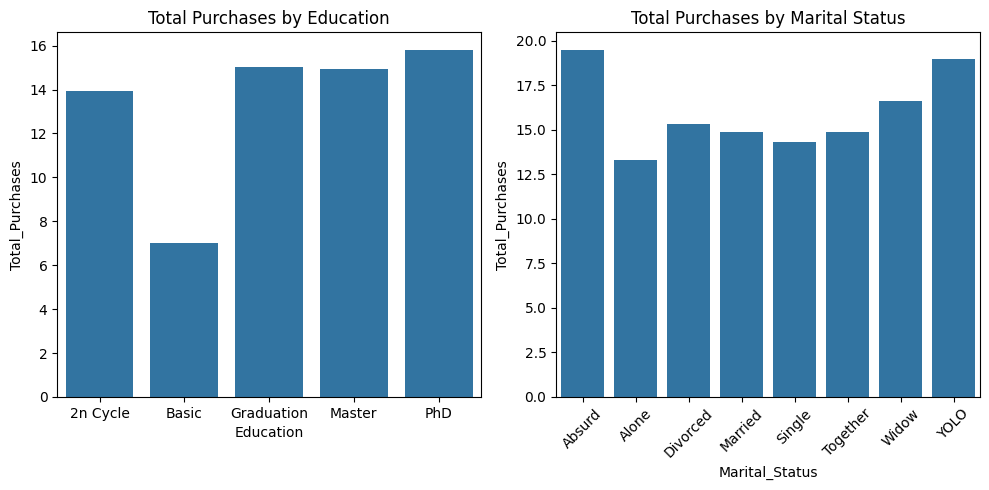

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# TODO: Bar plot for `Total_Purchases` by `Education`.
df1 = df.groupby(['Education'])['Total_Purchases'].mean().reset_index()
sns.barplot(df1, x = 'Education', y = 'Total_Purchases', ax = axes[0])
axes[0].set_title('Total Purchases by Education')

# TODO: Bar plot for `Total_Purchases` by `Marital_Status`.
df2 = df.groupby(['Marital_Status'])['Total_Purchases'].mean().reset_index()
sns.barplot(df2, x = 'Marital_Status', y = 'Total_Purchases', ax = axes[1])
axes[1].set_title('Total Purchases by Marital Status')
plt.xticks(rotation = 45)

plt.tight_layout();

**TO DO:** List 3 observations you've made from the visualizations above.
>*  Boxplot is a better choice to visualize categorical variables, and histgram is a better choice to visualize numerical variables.
>*  In terms of total purchase, basic education has the lowest average total purchase.
>*  In terms of total purchases, the average total purchases by marital status group seem to be generally higher than the average total purchases by education level group.

---
---



<h3 align = "center">
    Milestone #3: K-Means Clustering and Principal Component Analysis
</h3>

GOAL: The main goal of this milestone is to perform K-means clustering and dimensionality reduction using principal component analysis(PCA).

**Step 1:** Now that we have prepared the data and performed exploratory data analysis (EDA), we will now begin with one-hot encoding to encode the categorical variables in the dataset, followed by data scaling. [Find a resource here to better understand one hot encoding, including examples!](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review) To review the StandardScaler function, [review this resource.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [22]:
# TODO: Perform One-hot encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [23]:
# TODO: Perform data scaling using StandardScaler function.
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns= df.columns)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,-0.444294,-0.524941,-0.03011,-0.036886,-0.341824,-0.794181,1.920390,-0.589205,-0.188805,-0.03011
1,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,...,-0.444294,-0.524941,-0.03011,-0.036886,-0.341824,-0.794181,1.920390,-0.589205,-0.188805,-0.03011
2,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,...,-0.444294,-0.524941,-0.03011,-0.036886,-0.341824,-0.794181,-0.520728,1.697201,-0.188805,-0.03011
3,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,...,-0.444294,-0.524941,-0.03011,-0.036886,-0.341824,-0.794181,-0.520728,1.697201,-0.188805,-0.03011
4,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,...,-0.444294,1.904975,-0.03011,-0.036886,-0.341824,1.259158,-0.520728,-0.589205,-0.188805,-0.03011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.463060,-0.823235,0.907126,-0.104176,1.193988,0.415851,0.076455,0.077396,2.210723,3.913734,...,-0.444294,-0.524941,-0.03011,-0.036886,-0.341824,1.259158,-0.520728,-0.589205,-0.188805,-0.03011
2204,0.597834,2.901566,0.907126,0.241461,0.296050,-0.663644,-0.621422,-0.689014,-0.659786,-0.696581,...,-0.444294,1.904975,-0.03011,-0.036886,-0.341824,-0.794181,-0.520728,1.697201,-0.188805,-0.03011
2205,0.258218,-0.823235,-0.930428,1.451190,1.783722,0.541373,0.237151,-0.105082,-0.367870,-0.387941,...,-0.444294,-0.524941,-0.03011,-0.036886,2.925481,-0.794181,-0.520728,-0.589205,-0.188805,-0.03011
2206,0.850434,-0.823235,0.907126,-1.417597,0.361247,0.089492,0.223377,0.770816,0.070004,0.325790,...,2.250763,-0.524941,-0.03011,-0.036886,-0.341824,-0.794181,-0.520728,1.697201,-0.188805,-0.03011


---


**Step 2:** After One-hot encoding and data scaling, we can now execute dimensionality reduction using principal component analysis (PCA). Here's a [resource from IBM that further explains PCA.](https://www.ibm.com/topics/principal-component-analysis)

In [24]:
# TODO: Initialize and fit the PCA model.
pca = PCA(n_components = 3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["Group_1","Group_2", "Group_3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Group_1,2208.0,-6.436076e-18,2.953047,-4.894691,-2.740101,-0.685283,2.406035,9.209880
Group_2,2208.0,1.609019e-17,1.623509,-3.871841,-1.061148,-0.086058,0.691884,9.326057
Group_3,2208.0,1.255035e-16,1.541697,-4.170848,-1.082265,-0.161029,0.949658,5.647095


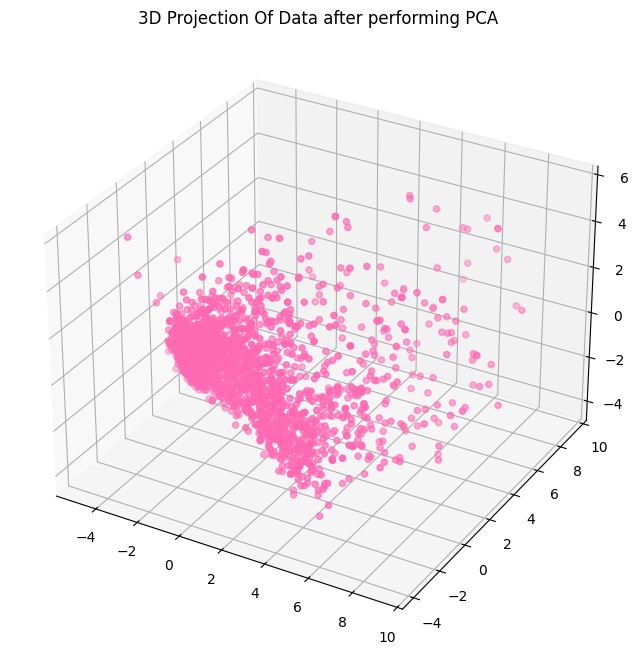

In [26]:
# TODO: Ploting the 3D Projection of Data after PCA
x = PCA_df["Group_1"]
y = PCA_df["Group_2"]
z = PCA_df["Group_3"]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "hotpink")
ax.set_title("3D Projection Of Data after performing PCA")
plt.show()

---

**Step 3:** In this step, we will use the Elbow method to determine the optimal number of clusters and fit the K-Means model. [Here's an explanation of the Elbow method.](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

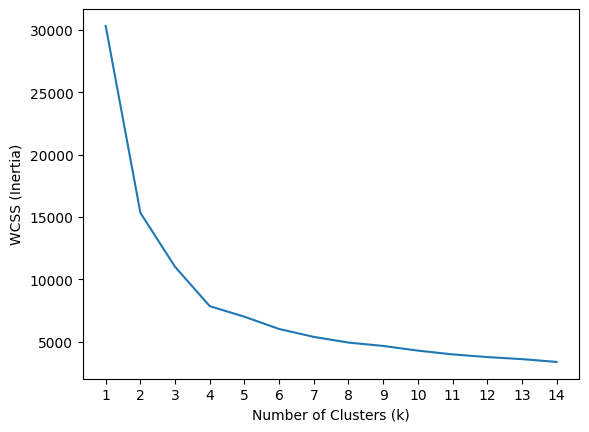

In [27]:
# TODO: Use Elbow method to determine the best number of clusters.
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

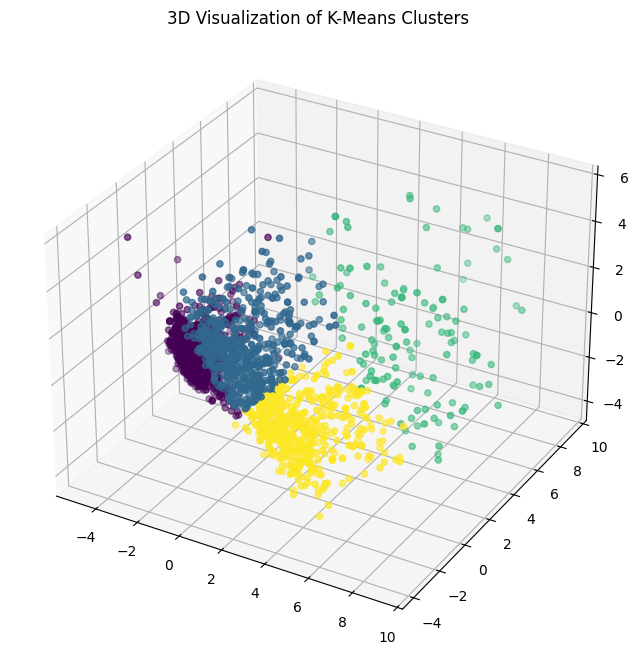

In [28]:
# TODO: Fit the K-Means model with the number of clusters and visualize it in 3D.
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(PCA_df)
df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x, y, z, c = df["Cluster"])
ax.set_title("3D Visualization of K-Means Clusters")
plt.show()

# New Section

---
---

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to the NSDC HQ team at nsdc@nebigdatahub.org in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.